%% Monte Carlo simulation of a Merton jump-diffusion process
% X(t) = (muS-0.5*sigma^2)*t + sigma*W(t) + sum_{i=1}^{N(t)} Z_i

% Define parameters and time grid
clear variables % clear all variables from workspace
npaths = 20000; % number of paths
T = 1; % time horizon
nsteps = 200; % number of time steps
dt = T/nsteps; % time step
t = 0:dt:T; % observation times
muS = 0.2; sigma = 0.3; % model parameters of the diffusion part (GBM)
muJ = -0.1; sigmaJ = 0.15; lambda = 0.5; % model parameters of the jump part (NCPP)
S0 = 1; % initial stock price

%% Monte Carlo

% Compute the increments of the ABM
dW = (muS-0.5*sigma^2)*dt + sigma*sqrt(dt)*randn(nsteps,npaths);

% Compute the increments of the NCPP
dN = poissrnd(lambda*dt,[nsteps,npaths]);
dJ = muJ*dN + sigmaJ*sqrt(dN).*randn(nsteps,npaths);

% Sum the increments of the ABM and the NCPP
dX = dW + dJ;

% Accumulate the increments
X = [zeros(1,npaths); cumsum(dX)];

% Stock price
%S = S0*exp(X);

%% Expected, mean and sample path
figure(1)
close all
EX = (muS+lambda*muJ)*t; % expected path
plot(t,EX,'k',t,mean(X,2),':k',t,X(:,1:1000:end),t,EX,'k',t,mean(X,2),':k')
legend('Expected path','Mean path')
xlabel('t')
ylabel('X')
ylim([-1,1.2]);
title('Paths of a Merton jump-diffusion process X = \mut + \sigmaW(t) + \Sigma_{i=1}^{N(t)} Z_i')
print('-dpng','mjdpaths.png')

%% Probability density function at different times
figure(2)

[h,x] = hist(X(40,:),100);
f = h/(sum(h)*(x(2)-x(1)));
subplot(3,1,1)
bar(x,f)
ylabel('f_X(x,0.2)')
xlim([-1,1.2])
ylim([0,3])
title('Probability density function of a Merton jump-diffusion process at different times')

[h,x] = hist(X(100,:),100);
f = h/(sum(h)*(x(2)-x(1)));
subplot(3,1,2)
bar(x,f)
xlim([-1,1.2])
ylim([0,3])
ylabel('f_X(x,0.5)')

[h,x] = hist(X(end,:),100);
f = h/(sum(h)*(x(2)-x(1)));
subplot(3,1,3)
bar(x,f)
xlim([-1,1.2])
ylim([0,3])
xlabel('x')
ylabel('f_X(x,1)')

print('-dpng','mjddensities.png')


Formula for the model:


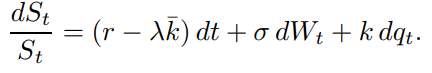



The remaining part comes from a Brownian Motion such as:

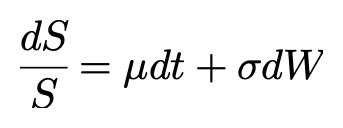



In [53]:
import random as r
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 200

-0.39782075026326574

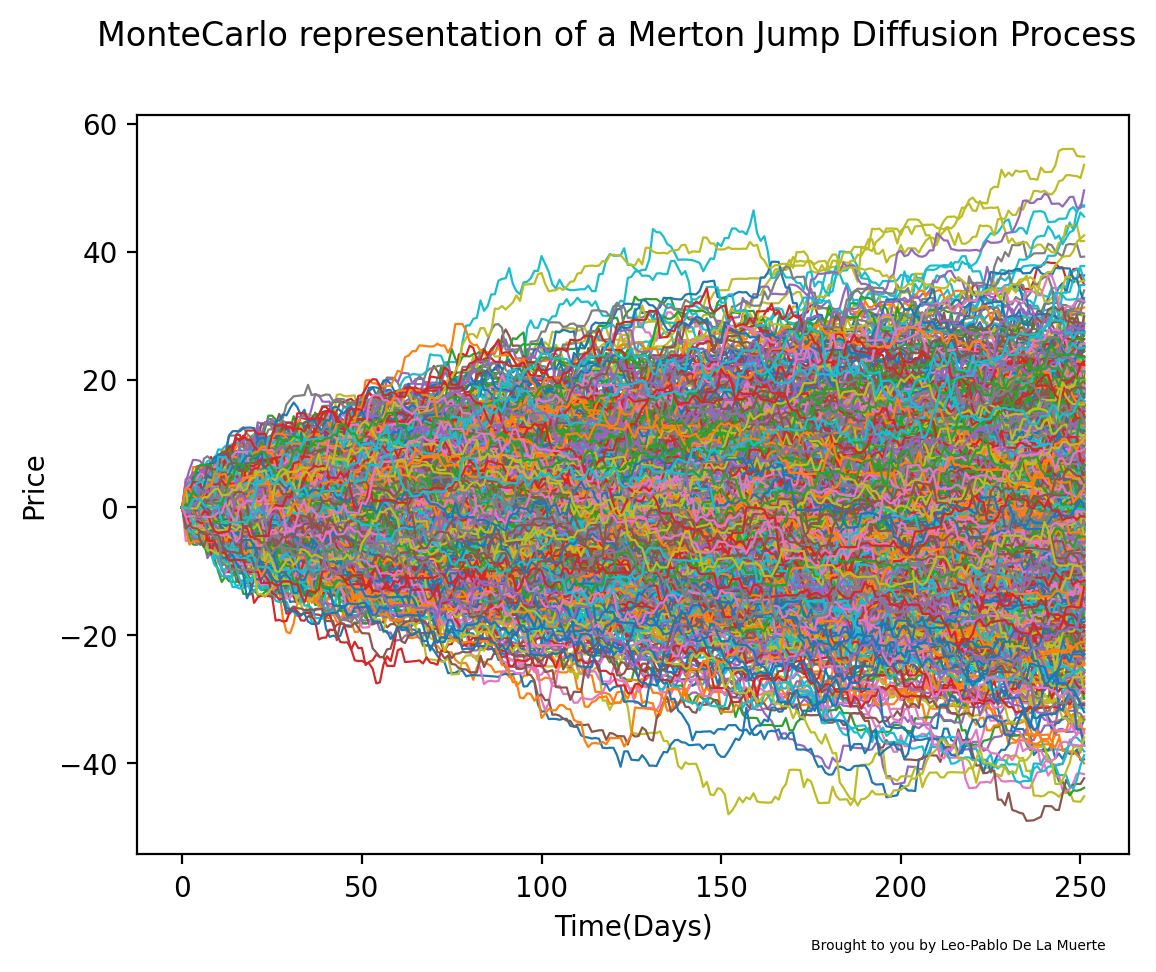

In [193]:
# Define parameters and time grid

MONTE_CARLO_NUMBER = 1000
T = 1
N = 252
dt = T/N

# N * T * MONTE_CARLO_NUMBER array to store everything

Storage = np.full(shape=(N*T, MONTE_CARLO_NUMBER), fill_value=0.0) 

# Param for the Brownian Motion terms
MUS = 0.0
SIGMA = 0

# Merton Jump Diffusion Params
K = 3
SIGMAJ = 1
LAMBDA = 1  # model parameters of the jump part (NCPP)
S0 = 0 # initial stock price


# sims :)

for Simulation in range(MONTE_CARLO_NUMBER):
    dBM = MUS * dt + np.sqrt(dt) * np.random.normal(size=(N-1))# differentials in Brownian Motion
    dJ = np.random.poisson(size=(N-1))
    dM = MUS * dJ + SIGMAJ * np.sqrt(dJ)*np.random.normal(size=(N-1))
    JDM1 = dBM + dM
    JUMPDIFFMODEL = np.concatenate((np.array([0]), np.cumsum(JDM1)))
    Storage[:,Simulation] = JUMPDIFFMODEL
    

plt.plot(Storage, linewidth=0.8)
plt.suptitle("MonteCarlo representation of a Merton Jump Diffusion Process")
plt.xlabel("Time(Days)")
plt.ylabel("Price")
plt.text(175, -69, "Brought to you by Leo-Pablo De La Muerte", fontsize=5)
plt.show
# muJ = -0.1; sigmaJ = 0.15; lambda = 0.5; % model parameters of the jump part (NCPP)


np.mean(Storage[N-1])

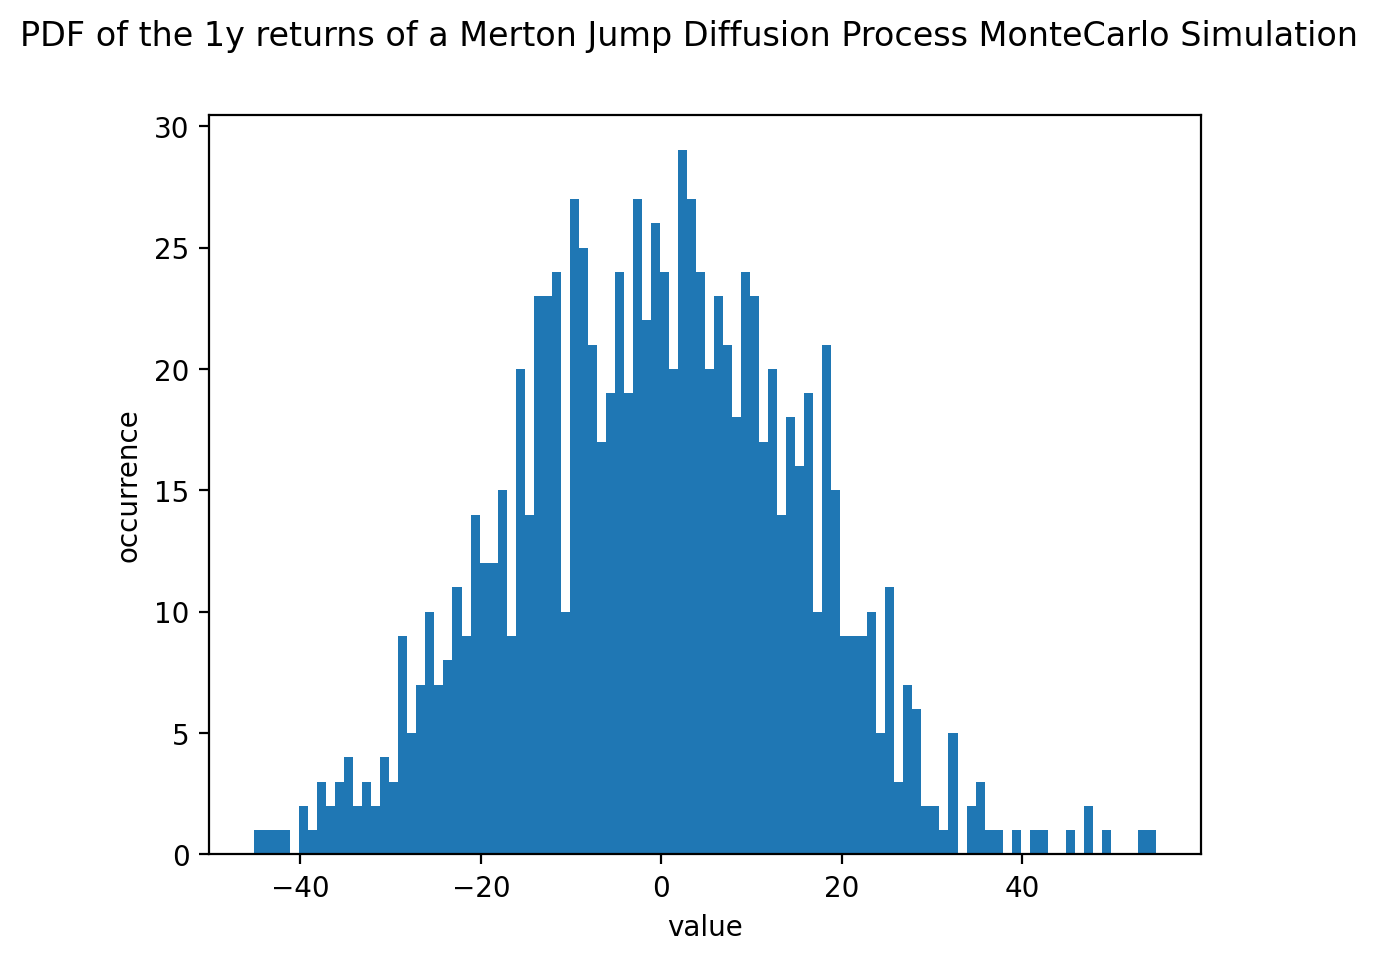

In [194]:
# Plot log returns now :)

JDM1 = np.round(Storage, decimals = 4)

plt.hist(Storage[N-1], bins=100)
plt.suptitle("PDF of the 1y returns of a Merton Jump Diffusion Process MonteCarlo Simulation")
plt.ylabel("occurrence")
plt.xlabel("value")
plt.show()